<a href="https://colab.research.google.com/github/barcellfe/datascience_study/blob/master/Aula_10_11_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prática Aula 10-11-2020 
Objetivo da aula: Praticar e resumir o que foi estudado até o capítulo 7 do livro Python para análise de dados

In [45]:
##importação de bibliotecas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as st
import datetime as dt
# Faltou esta:
import sklearn as sk

In [2]:
##Carregamento de dataset - Leitura do arquivo excel carregado previamente na área ao lado

global_dataset = pd.read_excel('Global Superstore.xls')


In [4]:
# Verificando a forma e a disposição dos dados ()
global_dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013


In [5]:
##informações relevantes do dataset - informação resumida da estrutura do Dataset

global_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [13]:
##modificação do dataset: criando campo ano / Deve-se ter conhecimento prévio da existência do campo Ship date no arquivo
global_dataset['Year'] = global_dataset['Ship Date'].dt.year
global_dataset['Month'] = global_dataset['Ship Date'].dt.month

In [15]:
# Verificando 
global_dataset['Year'].unique()

array([2012, 2013, 2011, 2014, 2015])

In [16]:
global_dataset['Month'].unique()

array([ 7,  2, 10,  1, 11,  4, 12,  6,  8,  9,  5,  3])

In [7]:
##resumo do dataset - resumo das estatísticas

global_dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818,2012.792728
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810,1.105303
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2015.000000


In [8]:
##verificar indices do dataset / Linhas

global_dataset.index

RangeIndex(start=0, stop=51290, step=1)

In [9]:
##verificar indices do dataset / Colunas

global_dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year'],
      dtype='object')

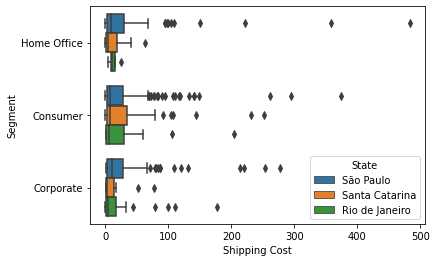

In [17]:
## reduzir o dataset para começar a fazer análise de dados
## Exemplo de análise:
## Diagrama de caixa com filtro, filtro de pertinencia e comparação de grupos
## O que o gráfico quer dizer?
##
global_br = global_dataset[global_dataset['Country'] == 'Brazil']
global_br2 = global_dataset[global_dataset['Country'] == 'Brazil'] # guarda a mesma info da linha anterior para uso futuro e poupando código
global_br = global_dataset[global_dataset['State'].isin(['São Paulo', 'Rio de Janeiro', 'Santa Catarina'])]
sns.boxplot(data = global_br, y = 'Segment', x = 'Shipping Cost', hue = 'State', orient="h")

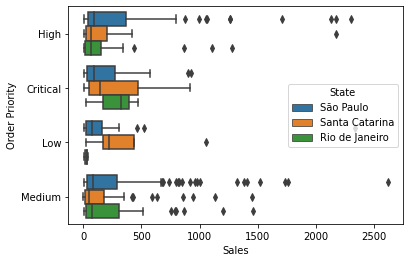

In [20]:
# alterando as categorias - trocando X de ship cost para Sales e Y de segmento para Order Priority
global_br2 = global_dataset[global_dataset['Country'] == 'Brazil'] # guarda a mesma info da linha anterior para uso futuro e poupando código
global_br = global_dataset[global_dataset['State'].isin(['São Paulo', 'Rio de Janeiro', 'Santa Catarina'])]
sns.boxplot(data = global_br, y = 'Order Priority', x = 'Sales', hue = 'State', orient="h")

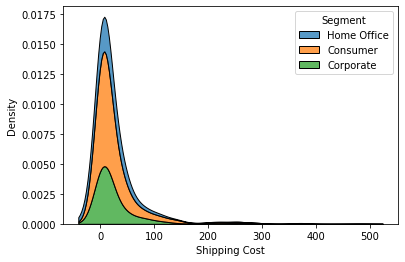

In [18]:
##Kernel plot do Shipping Cost
sns.kdeplot(data=global_br, x="Shipping Cost", hue="Segment", multiple="stack")

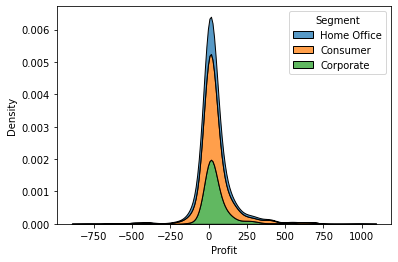

In [19]:
##Kernel plor do Lucro
sns.kdeplot(data=global_br, x="Profit", hue="Segment", multiple="stack")


In [21]:
##Tabela de lucro por período.
##Veja como o ano criado se torna interligado com o restante da tabela
global_br2.pivot_table('Profit', index = 'Year', columns = 'Category', aggfunc=sum)

Category,Furniture,Office Supplies,Technology
Year,,,
2011,1955.348,1948.620,-605.26700
2012,5294.012,1390.896,2322.71264
2013,-898.184,1119.632,2118.95600
2014,5941.512,2921.960,5236.59532
2015,768.880,244.940,329.88600


In [26]:
# alterando os dados
global_br2.pivot_table('Shipping Cost', index = ['Year', 'Month'], columns = 'Category', aggfunc=sum)

Category    Furniture  Office Supplies  Technology
Year Month                                        
2011 1        109.129           29.756         NaN
     2         31.536            2.992     188.265
     3         27.444           12.166       4.813
     4        157.123          147.311     211.266
     5            NaN           22.745     273.026
     6        346.576          169.608     403.344
     7         28.071          238.694     276.128
     8        223.627            9.150      70.243
     9        567.185          242.867      83.523
     10       609.266           53.902      45.748
     11        64.015          254.221     109.361
     12       283.328          233.029     315.419
2012 1         74.406           58.552      93.534
     2        108.113          129.192      69.412
     3        137.116           39.161     101.391
     4            NaN           23.908     393.222
     5        272.406          292.042     480.553
     6        189.250           42.826     300.630
     7        346.403          173.785     389.816
     8        270.858          769.511     181.780
     9        104.298          225.466     169.818
     10       432.695          107.831     128.165
     11      1400.047          265.243     158.569
     12       355.247          283.266     741.714
2013 1        436.305          282.429      41.699
     2        216.819           70.285      55.923
     3        512.511          169.155     333.535
     4        234.327          399.509     258.202
     5         35.757          168.430     157.087
     6        116.126          192.555     250.882
     7        726.112          215.873     171.465
     8        155.248          146.498     184.833
     9        517.085          301.906     282.075
     10       546.285           91.191     470.850
     11       133.725          152.600     416.592
     12       960.860          213.757     431.513
2014 1         64.491           19.835     282.052
     2         95.077            3.535         NaN
     3        154.734          197.996         NaN
     4         61.815           77.687     211.952
     5        380.675          194.650     316.835
     6        523.283          330.718     398.092
     7        363.158          101.990     445.391
     8         89.957          173.806     398.644
     9        895.155          512.868     720.285
     10      1271.460          559.178     546.314
     11       853.654          338.388     348.056
     12       588.622          175.782     734.937
2015 1        207.381           65.918     260.566

In [25]:
# fazendo a transposta
global_br2.pivot_table('Shipping Cost', index = ['Year', 'Month'], columns = 'Category', aggfunc=sum).T

Year                2011                   ...     2014              2015
Month                 1        2       3   ...       11       12       1 
Category                                   ...                           
Furniture        109.129   31.536  27.444  ...  853.654  588.622  207.381
Office Supplies   29.756    2.992  12.166  ...  338.388  175.782   65.918
Technology           NaN  188.265   4.813  ...  348.056  734.937  260.566

[3 rows x 49 columns]

In [27]:
# Alterando os argumentos
global_br2.pivot_table('Sales', index = ['Year', 'Month'], columns = 'State', aggfunc=sum).pivot_table

Year                     2011              ...        2014      2015
Month                      1           2   ...          12        1 
State                                      ...                      
Acre                      NaN         NaN  ...         NaN       NaN
Alagoas                74.304         NaN  ...   438.43600       NaN
Amapá                     NaN         NaN  ...         NaN       NaN
Amazonas               38.400         NaN  ...     9.52000       NaN
Bahia                     NaN   143.26400  ...    34.68000       NaN
Ceará                     NaN         NaN  ...         NaN       NaN
Espírito Santo            NaN         NaN  ...         NaN       NaN
Federal District          NaN         NaN  ...    74.40000       NaN
Goiás                     NaN         NaN  ...         NaN       NaN
Maranhão                  NaN         NaN  ...  1347.03096       NaN
Mato Grosso               NaN         NaN  ...   178.56000       NaN
Mato Grosso do Sul        NaN         NaN  ...         NaN       NaN
Minas Gerais              NaN         NaN  ...  2038.80000       NaN
Parana               1797.400   189.93936  ...   569.06000       NaN
Paraíba                   NaN         NaN  ...         NaN       NaN
Pará                      NaN         NaN  ...         NaN  1875.420
Pernambuco                NaN         NaN  ...   242.46000       NaN
Piauí                     NaN         NaN  ...         NaN       NaN
Rio Grande do Norte       NaN         NaN  ...   184.76000       NaN
Rio Grande do Sul         NaN  1539.81504  ...         NaN       NaN
Rio de Janeiro            NaN         NaN  ...         NaN       NaN
Rondônia                  NaN         NaN  ...         NaN       NaN
Roraima                   NaN         NaN  ...         NaN       NaN
Santa Catarina            NaN         NaN  ...   419.78680   575.480
Sergipe                   NaN         NaN  ...         NaN       NaN
São Paulo              61.580   492.62400  ...  5552.08000  1754.506
Tocantins                 NaN         NaN  ...         NaN       NaN

[27 rows x 49 columns]

In [28]:
##Tabela de lucro por período.
##Veja como o ano criado se torna interligado com o restante da tabela
global_br2.pivot_table('Profit', index = 'State', columns = 'Year', aggfunc=sum)

Year,2011,2012,2013,2014,2015
State,,,,,
Acre,6.20000,73.68000,NaN,114.02000,NaN
Alagoas,-532.85780,-168.10800,-757.98800,9.32800,NaN
Amapá,310.53316,220.67200,NaN,717.42000,NaN
Amazonas,227.01600,31.68000,758.53592,654.72000,NaN
Bahia,-2863.26400,-2822.61600,-2376.59744,-23.16700,NaN
Ceará,-510.82356,-693.96784,-1214.05376,131.89200,NaN
Espírito Santo,NaN,NaN,351.60000,175.88000,NaN
Federal District,56.62000,964.95844,582.25992,610.94032,NaN
Goiás,174.36000,436.20000,1060.25316,200.52000,NaN


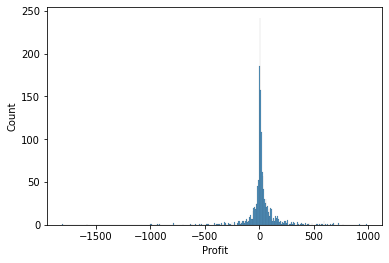

In [29]:
##Análise de Histograma
##Distribuição dos lucros (profit)
sns.histplot(data = global_br2, x = 'Profit')

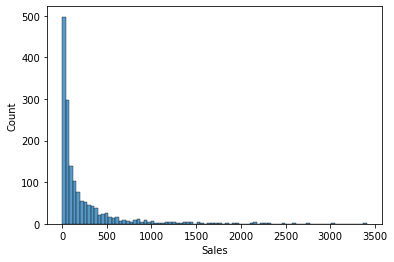

In [30]:
##Distribuição das Vendas
sns.histplot(data = global_br2, x = 'Sales')

In [31]:
##Manipulação de tabelas usando groupby e agregando por uma chave única
pd.options.display.max_rows = 999
global_br2.groupby(['Year', 'Category', 'Sub-Category']).Sales.agg(['min', 'max', 'sum'])

min         max          sum
Year Category        Sub-Category                                     
2011 Furniture       Bookcases       84.34000  1648.44000  10826.99200
                     Chairs          84.52000  2147.60000  10894.59200
                     Furnishings     10.70400   344.00000    979.17600
                     Tables          38.14400  1274.24000   2141.96800
     Office Supplies Appliances      25.41600  1133.22000   5090.96000
                     Art             13.07200   179.00000    985.11200
                     Binders         12.36000   130.56000    647.88000
                     Envelopes       16.08000   138.72000    980.84400
                     Fasteners        7.87200    90.02000    517.58000
                     Labels           2.40000    57.12000    244.92000
                     Paper            7.18400   269.28000    824.28400
                     Storage         12.44000   526.64000   2134.56000
                     Supplies        22.01600   230.22000    974.76000
     Technology      Accessories     20.43200   467.04000   3098.96400
                     Copiers        114.76728  1198.29860   7926.50500
                     Machines        93.06000   358.00000    992.17200
                     Phones          44.04800   850.00000   7327.55200
2012 Furniture       Bookcases       77.31200  2615.94000  12962.92000
                     Chairs          49.29600  2221.80000  13089.86800
                     Furnishings     23.48000   428.28000   4412.28400
                     Tables         176.14400  1454.83200   4789.36000
     Office Supplies Appliances      76.08000  2461.06000   7946.36800
                     Art              7.05600   311.60000   1488.38800
                     Binders          3.58400   141.12000    915.04400
                     Envelopes        6.28000   241.28000   1608.24800
                     Fasteners       15.32000    68.32000    679.11600
                     Labels           3.49600    55.62000    468.18400
                     Paper            8.84000   232.40000   1987.36000
                     Storage         14.86000  1455.08000   4889.27200
                     Supplies        11.40000   138.60000   1340.15600
     Technology      Accessories     38.25600  2297.96000   6213.31600
                     Copiers         64.44416  1761.86920  15593.08464
                     Machines       104.16000   642.99200   1772.61200
                     Phones          43.58000  3408.00000   9554.72000
2013 Furniture       Bookcases       66.35200  2751.20000  13503.66800
                     Chairs          15.40800  2142.00000  14894.73600
                     Furnishings     11.82400   370.40000   4241.36400
                     Tables         142.68800  1970.49600  10516.64800
     Office Supplies Appliances      18.79200  1403.36000   5571.36000
                     Art              6.59200   101.58000    959.20000
                     Binders          2.84800   240.10000   1696.55200
                     Envelopes        2.27200   217.12000   1771.20400
                     Fasteners        4.68800    54.00000    593.52000
                     Labels           5.64000    89.52000    669.24400
                     Paper            7.00800   196.08000   1701.74000
                     Storage          5.76000   795.60000   6181.58800
                     Supplies        10.70000   366.08000   2481.32400
     Technology      Accessories      7.89600  1205.54000   6962.18800
                     Copiers         63.68000  1057.97980  11526.15600
                     Machines       137.85600   703.04000   1833.92800
                     Phones          64.44000  2171.30000   9879.96400
2014 Furniture       Bookcases       96.48000  1451.50000  16564.80400
                     Chairs          36.12000  2460.96000  15933.78000
                     Furnishings     14.95200   439.92000   3308.70400
                     Tables         168.48000  2332.96000   8313.9

In [32]:
global_sales = global_br2.pivot_table('Sales', index = 'Year',columns = 'Category', aggfunc=sum)
global_sales['Year'] = global_sales.index
global_sales = global_sales.melt(id_vars='Year')
global_sales

,Year,Category,value
0,2011,Furniture,24842.72800
1,2012,Furniture,35254.43200
2,2013,Furniture,43156.41600
3,2014,Furniture,44121.27200
4,2015,Furniture,2164.68000
5,2011,Office Supplies,12400.90000
6,2012,Office Supplies,21322.13600
7,2013,Office Supplies,21625.73200
8,2014,Office Supplies,27105.70000
9,2015,Office Supplies,701.46000


(array([2010.5, 2011. , 2011.5, 2012. , 2012.5, 2013. , 2013.5, 2014. ,
        2014.5, 2015. , 2015.5]), <a list of 11 Text major ticklabel objects>)

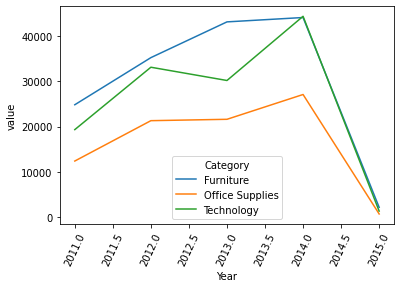

In [33]:
##Gráfico de Série Temporal
g = sns.lineplot(data = global_sales, x = 'Year', y = 'value', hue = 'Category')
plt.xticks(rotation=65)

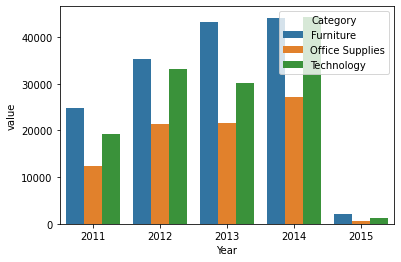

In [34]:
##Gráfico de barras empilhadas
sns.barplot(data = global_sales, x = 'Year', y = 'value', hue = 'Category')

In [35]:
# Vendas por Sub-categoria, e por estado
global_corr = global_br2.pivot_table('Sales', index = 'Sub-Category',columns = 'State', aggfunc=sum)
global_corr

State,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Espírito Santo,Federal District,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Parana,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Sub-Category,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accessories,NaN,232.1440,NaN,1790.88000,337.32000,590.75200,188.06,612.46000,1694.84000,694.11200,NaN,NaN,1943.24400,156.88000,279.6000,149.6000,889.40000,NaN,55.36000,488.5800,1708.04000,NaN,108.36000,862.7560,325.36,7164.56000,74.08
Appliances,NaN,444.6240,NaN,NaN,1020.54800,557.18400,NaN,112.52000,NaN,25.41600,NaN,NaN,3956.12800,3758.92000,2831.5800,NaN,1699.29600,NaN,NaN,3649.5400,573.37600,NaN,NaN,2605.4640,76.08,7341.82800,NaN
Art,59.10,192.8320,15.92000,45.68000,653.32000,287.20800,99.06,162.24000,53.84000,318.58000,NaN,179.10000,404.77200,127.86000,173.7800,284.0400,258.12000,NaN,67.00800,635.7400,188.33600,NaN,47.40000,128.4720,NaN,1404.71600,NaN
Binders,29.66,36.3800,23.84000,93.78000,422.00800,760.27200,12.08,204.20000,174.28000,102.05600,29.12000,NaN,520.94800,250.42000,138.5400,NaN,240.83200,89.50000,15.24000,145.2000,240.98000,NaN,NaN,250.0400,369.66,1588.38000,108.86
Bookcases,562.76,1040.0800,NaN,824.22000,3665.76400,2322.58000,NaN,283.80000,1314.44000,1414.88400,339.60000,731.82000,5197.46000,3493.92000,NaN,2077.8000,4520.20800,NaN,575.96000,5284.1600,4297.57200,NaN,NaN,2706.1760,NaN,12054.60000,2981.36
Chairs,NaN,843.8440,1797.50000,1560.73600,4183.45200,406.93600,991.16,3508.98000,483.74000,3924.25200,1791.68000,309.12000,4118.18000,6761.96000,2211.6400,930.0000,3183.22400,NaN,445.04800,1994.2000,1387.50400,NaN,NaN,3446.2720,577.62,9762.86800,526.96
Copiers,NaN,253.4862,692.03316,189.65992,1997.88356,2558.33484,NaN,1507.63868,692.03316,1217.32396,130.08232,1297.32016,5133.96584,4255.09276,758.0808,806.7832,3023.98612,513.59076,1893.27072,2326.4378,4260.44204,195.44832,1109.09736,1866.6394,NaN,18207.57188,NaN
Envelopes,NaN,300.0200,NaN,66.56000,155.06400,221.42000,72.18,205.82000,325.70000,263.19200,35.32000,NaN,489.09600,320.96000,199.2000,288.6600,291.39200,77.10000,116.64000,500.6600,387.22800,NaN,NaN,480.0080,NaN,1609.78000,58.30
Fasteners,NaN,51.4160,NaN,128.42000,257.88800,77.28400,NaN,170.76000,21.48000,26.04000,59.33600,18.16000,258.78400,104.16000,NaN,131.0800,220.20000,NaN,10.72800,169.7000,162.73200,NaN,NaN,191.5320,NaN,901.52000,18.16


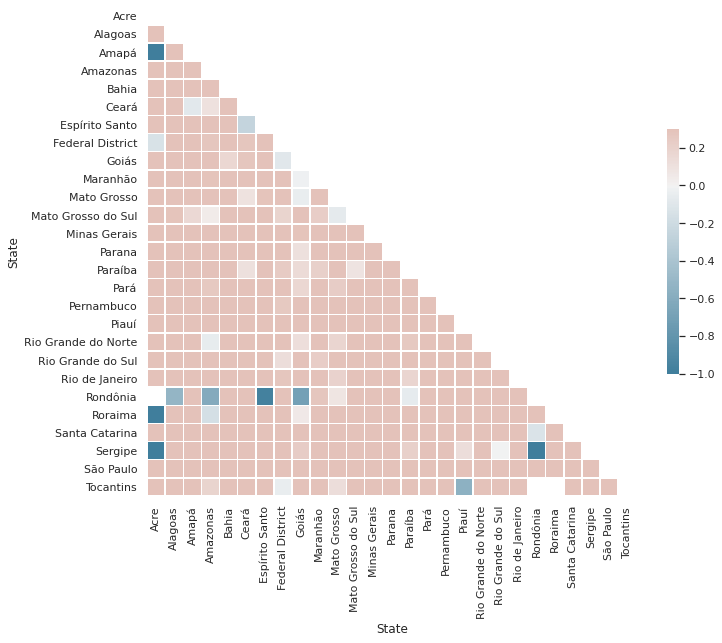

In [36]:
## com os dados da tabela do item anterior podemo criar um gráfico / diagonal corrplot

sns.set_theme(style="white")
corr = global_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
##Manipulação de diagramas de dispersão e regressão
global_values = global_br2.groupby(['Year', 'Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean'})
global_values

Sales      Profit  Discount
Year Category        Sub-Category                                   
2011 Furniture       Bookcases     10826.99200  1831.09200  0.114286
                     Chairs        10894.59200   677.57200  0.218182
                     Furnishings     979.17600   188.89600  0.133333
                     Tables         2141.96800  -742.21200  0.450000
     Office Supplies Appliances     5090.96000  1114.84000  0.120000
                     Art             985.11200    46.95200  0.160000
                     Binders         647.88000   139.58000  0.046154
                     Envelopes       980.84400   -60.87600  0.150000
                     Fasteners       517.58000    61.06000  0.105882
                     Labels          244.92000    42.70000  0.109091
                     Paper           824.28400   155.82400  0.120000
                     Storage        2134.56000   277.86000  0.085714
                     Supplies        974.76000   170.68000  0.150000
     Technology      Accessories    3098.96400   217.78400  0.225000
                     Copiers        7926.50500   570.00500  0.135333
                     Machines        992.17200  -206.14800  0.360000
                     Phones         7327.55200 -1186.90800  0.208696
2012 Furniture       Bookcases     12962.92000  1460.96000  0.142857
                     Chairs        13089.86800  3070.60800  0.093750
                     Furnishings    4412.28400   585.32400  0.103448
                     Tables         4789.36000   177.12000  0.266667
     Office Supplies Appliances     7946.36800  -239.01200  0.163636
                     Art            1488.38800   187.94800  0.166667
                     Binders         915.04400    50.42400  0.120000
                     Envelopes      1608.24800    61.50800  0.184615
                     Fasteners       679.11600   141.89600  0.057143
                     Labels          468.18400    10.68400  0.216000
                     Paper          1987.36000   390.56000  0.116129
                     Storage        4889.27200   514.01200  0.136364
                     Supplies       1340.15600   272.87600  0.075000
     Technology      Accessories    6213.31600  2069.85600  0.075000
                     Copiers       15593.08464  1489.96464  0.194857
                     Machines       1772.61200  -794.60800  0.200000
                     Phones         9554.72000  -442.50000  0.033333
2013 Furniture       Bookcases     13503.66800 -2608.75200  0.329032
                     Chairs        14894.73600  2444.89600  0.200000
                     Furnishings    4241.36400   570.78400  0.105882
                     Tables        10516.64800 -1305.11200  0.366667
     Office Supplies Appliances     5571.36000  -297.06000  0.200000
                     Art             959.20000    98.00000  0.168000
                     Binders        1696.55200   105.87200  0.136364
                     Envelopes      1771.20400    92.96400  0.211765
                     Fasteners       593.52000    32.50000  0.206897
                     Labels          669.24400   114.72400  0.115385
                     Paper          1701.74000    86.48000  0.171429
                     Storage        6181.58800   581.18800  0.141176
                     Supplies       2481.32400   304.96400  0.125000
     Technology      Accessories    6962.18800   342.70800  0.206250
                     Copiers       11526.15600  1218.97600  0.109143
                     Machines       1833.92800   523.20800  0.200000
                     Phones         9879.96400    34.06400  0.186207
2014 Furniture       Bookcases     16564.80400  3306.96400  0.072727
                     Chairs        15933.78000  2383.60000  0.153488
                     Furnishings    3308.70400   806.36400  0.100000
                     Tables         8313.98400  -555.41600  0.280000
     Office Supplies Appliances    10043.81600  1077.57600  0.141176
                     Art            235

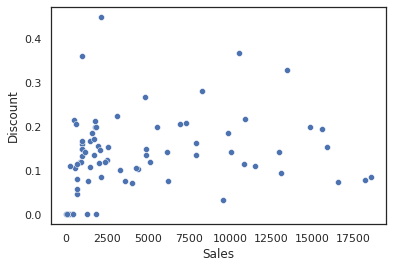

In [38]:
##Scatterplot
scat_data = global_values[['Sales', 'Discount']]
sns.scatterplot(data=scat_data, x="Sales", y="Discount")

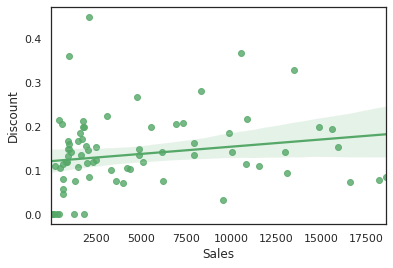

In [39]:
##Regplot
sns.regplot(x='Sales', y='Discount', color="g", data = scat_data)

In [42]:
br_sumary = global_br2.groupby(['Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean'})
br_sumary.head()

,Sales,Profit,Discount
Sub-Category,,,
Accessories,20346.388,3829.208,0.160000
Appliances,28652.504,1656.344,0.156000
Art,5787.124,580.864,0.148387
Binders,5846.276,528.296,0.129851
Bookcases,55689.164,4759.144,0.168224


In [43]:
br_sumary = br_sumary.sort_values('Discount', ascending= False)
br_sumary

,Sales,Profit,Discount
Sub-Category,,,
Tables,25761.96000,-2425.62000,0.331250
Machines,8214.21200,44.05200,0.192000
Envelopes,6464.30000,325.14000,0.174545
Bookcases,55689.16400,4759.14400,0.168224
Chairs,55146.87600,8576.67600,0.162857
Accessories,20346.38800,3829.20800,0.160000
Appliances,28652.50400,1656.34400,0.156000
Art,5787.12400,580.86400,0.148387
Fasteners,2979.38000,381.14000,0.135849


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

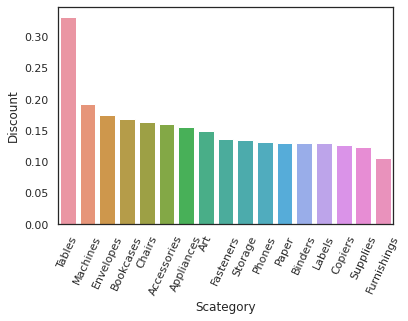

In [47]:
br_sumary = br_sumary.sort_values('Discount', ascending= False)
br_sumary['Scategory'] = br_sumary.index
sns.barplot(data = br_sumary, x = 'Scategory', y = 'Discount')
plt.xticks(rotation=65)

In [51]:
# Exercício - Qual o valor médio dos pedidos de vendas (Sales) versus o custo médio de envio (shipping cost) por país e modo de envio (ship mode)? 
Sales_sumary = global_dataset.groupby(['Country', 'Ship Mode']).agg({'Shipping Cost': 'mean', 'Sales': 'mean'})
Sales_sumary

Shipping Cost        Sales
Country                          Ship Mode                                 
Afghanistan                      First Class        169.040000   948.245000
                                 Second Class        19.511111   183.490000
                                 Standard Class      27.759750   358.311000
Albania                          First Class        206.560000   553.920000
                                 Same Day            59.240000   182.070000
                                 Second Class        70.172000   408.318000
                                 Standard Class       9.101111   123.393333
Algeria                          First Class         27.732500   236.193214
                                 Same Day            40.136667   155.982500
                                 Second Class        18.631020   181.638367
                                 Standard Class      14.535888   174.823458
Angola                           First Class         24.360000   196.900000
                                 Same Day            28.750000   317.676000
                                 Second Class        21.129167   174.065000
                                 Standard Class      18.636667   213.869655
Argentina                        First Class         33.417000   173.816404
                                 Same Day            22.005844   171.387259
                                 Second Class        15.957644   150.919172
                                 Standard Class      12.206704   136.286071
Armenia                          Standard Class       4.500000    52.250000
Australia                        First Class         55.280786   319.326008
                                 Same Day            52.604881   288.421500
                                 Second Class        40.968504   308.656073
                                 Standard Class      27.256475   337.760391
Austria                          First Class         40.358519   264.920556
                                 Same Day            48.185789   218.153684
                                 Second Class        35.362745   241.105294
                                 Standard Class      23.139324   298.512319
Azerbaijan                       First Class         39.270000   226.620000
                                 Same Day            32.874286   134.245714
                                 Second Class         3.448000    33.726000
                                 Standard Class      35.400667   271.328000
Bahrain                          Second Class        36.380000   334.590000
Bangladesh                       First Class         69.355652   508.614783
                                 Same Day            46.000000   262.092000
                                 Second Class        53.459487   447.436154
                                 Standard Class      38.058021   497.894375
Barbados                         First Class          0.716000    19.720000
                                 Same Day             1.800000    15.060000
                                 Second Class        32.868222   273.869093
                                 Standard Class      25.900200   311.644805
Belarus                          First Class         38.416667   536.425000
                                 Same Day            16.580000    93.720000
                                 Second Class        33.777000   220.510500
                                 Standard Class       9.304400   107.649000
Belgium                          First Class         52.657273   278.596364
                                 Same Day            32.835000   218.703750
                                 Second Class        28.969677   221.706774
                                 Standard Class      32.013605   400.872558
Benin                            First Class         30.234286   216.621429
                                 Same Day             5.040000    39.360000
                     